# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [5]:
# Importer nødvendige biblioteker
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Indlæs datasættet fra Excel
# car_prices.xlsx skal være i samme mappe som notebooken
data = pd.read_excel("car_prices.xlsx")

# Undersøg datasættet visuelt
display(data)

# Definér features og response variabel
# Vi skal forudsige 'Price (DKK)', så den fjernes fra X og gemmes som y
X = data.drop("Price (DKK)", axis=1)
y = data["Price (DKK)"]

# Fjern kolonnen 'All Wheel Drive (AWD)' pga. fejl i opgaveformuleringen
X = X.drop(columns=["All-Wheel Drive (AWD)"])

# Split datasættet i træningsdata og testdata (80% træning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiserer (skalerer) feature-matrix X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardiserer target y separat – vigtigt: fit kun på y_train!
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Konverter arrays tilbage til DataFrames for bedre overblik
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Tjek størrelser på datasættene
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}\n")

,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,414000,2023,12000,514,70.0,173,780,534,3.7,250,1600,452216,5,0,1,0
6222,289000,2021,90000,469,78.0,193,780,408,4.7,210,1500,395420,5,0,1,0
6223,385000,2023,11000,450,66.0,170,780,286,6.0,190,1600,475675,5,1,0,0
6224,109900,2017,90000,280,28.0,115,780,120,9.9,165,1000,279994,5,0,0,1


X_train shape: (4980, 14), X_test shape: (1246, 14)

y_train shape: (4980,), y_test shape: (1246,)



## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.

In [7]:
import numpy as np

# Tilføjer 1-taller som første kolonne for at håndtere intercept (skæringspunkt)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Konverterer y_train til en numpy-array (kolonne-vektor)
y_train_np = y_train_scaled.reshape(-1, 1)

# Løser normal ligning: B = (X^T X)^-1 X^T y
X_T_X = X_b.T @ X_b                # Beregner X transponeret gange X
X_T_X_inv = np.linalg.inv(X_T_X)  # Finder den inverse af X^T * X
X_T_y = X_b.T @ y_train_np        # Beregner X transponeret gange y
B = X_T_X_inv @ X_T_y             # Udregner B (koefficientvektor)

# Konverterer koefficienter til DataFrame for bedre overskuelighed
feature_names = ["Intercept"] + list(X_train_scaled.columns)
coefficients = {feature_names[i]: B[i, 0] for i in range(len(feature_names))}
coef_df = pd.DataFrame(coefficients.items(), columns=["Feature", "Coefficient"])

# Formater koefficienterne til 4 decimaler for pæn visning
coef_df["Coefficient"] = coef_df["Coefficient"].apply(lambda x: f"{x:.4f}")

# Viser resultatet
display(coef_df)


,Feature,Coefficient
0,Intercept,-0.0000
1,Model Year,0.1680
2,Mileage (km),-0.1032
3,Electric Range (km),0.0706
4,Battery Capacity (kWh),0.0054
5,Energy Consumption (Wh/km),0.0182
6,Annual Road Tax (DKK),-0.0627
7,Horsepower (bhp),0.0180
8,0-100 km/h (s),0.0770
9,Top Speed (km/h),0.0256


### Fortolkning af regressionskoefficienter

Hver koefficient angiver, hvor meget bilens pris (i standardiserede enheder) ændrer sig, når en feature stiger med 1 standardafvigelse – alt andet holdt konstant.

#### Udvalgte observationer:
- **Model Year (0.1680):**
  Nyere biler er typisk dyrere – det giver en stærk positiv effekt på prisen.

- **Mileage (-0.1032):**
  Jo flere kilometer bilen har kørt, jo lavere er prisen. Det er forventeligt og tyder på slid.

- **Original Price (0.8500):**
  Høj positiv koefficient – en bil, der har kostet meget fra ny, er også dyrere som brugt. Det er den mest dominerende forklarende variabel.

- **0–100 km/h tid (0.0770):**
  Positiv sammenhæng – lidt overraskende, da man kunne forvente, at lavere accelerationstid (hurtigere bil) giver højere pris. Kan skyldes korrelation med fx motoreffekt eller luksusfaktor.

- **Energy Consumption (0.0182):**
  Let positiv sammenhæng – muligvis fordi større og dyrere biler bruger mere energi.

- **Towing Capacity (0.0475):**
  Tyder på, at mere funktionelle biler også er dyrere.

#### Binære variable:
- **Rear-Wheel Drive (0.0409)** og **Front-Wheel Drive (0.0048):**
  Positiv sammenhæng – baghjulstræk ser ud til at have lidt større positiv effekt end forhjulstræk.

#### Negativt bidrag:
- **Annual Road Tax (-0.0627):**
  Højere årlig afgift trækker prisen ned – giver mening, da det er en løbende udgift for ejeren.

---

### Fortolkning af intercept:
- Intercept ≈ 0, fordi både X og y er skaleret → intercept har ikke konkret tolkning her, men er nødvendig i regressionsmodellen.

Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [8]:
# Evaluerer modellen på testdata
from sklearn.metrics import mean_squared_error, r2_score

# Tilføj 1-taller til testdata (for intercept)
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Beregn forudsagte værdier (skaleret)
y_pred_scaled = X_test_b @ B

# Konverter y_pred og y_test tilbage til original skala
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred = y_pred.flatten()

# Udregn MSE og RMSE
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

# Udregn R-squared
r2 = r2_score(y_test_original, y_pred)

# Udskriv resultaterne
print("Model Evaluering:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

y_test shape: (1246, 1), y_pred shape: (1246,)
Model Evaluation:
Mean Squared Error (MSE): 2,774,486,707.59
Root Mean Squared Error (RMSE): 52,673.40
R-squared (R²): 0.8644


### Fortolkning af modelens præcision (MSE, RMSE og R²)

For at vurdere hvor godt modellen passer til data, bruges tre centrale metrikker:

#### Mean Squared Error (MSE)
- Gennemsnitlig kvadreret afvigelse mellem de faktiske og forudsagte priser.
- En lav MSE betyder, at modellen generelt rammer tæt på de rigtige værdier.
- I vores tilfælde: **ca. 2.774.486.707**, hvilket svarer til squared units i pris – sværere at fortolke direkte.

#### Root Mean Squared Error (RMSE)
- Kvadratroden af MSE, som bringer resultatet tilbage til samme skala som prisen.
- I vores model: **ca. 52.673 DKK** → modellen rammer i gennemsnit med en fejl på omkring 52.000 kr.
- Det er et rimeligt niveau, givet prisernes variation.

#### R² – Forklaringsgrad
- R² = 0.8644 → modellen forklarer ca. **86 % af variationen i bilpriserne**
- Det er et stærkt resultat og tyder på god modeltilpasning.
- En perfekt model ville have R² = 1, mens en tilfældig model ville ligge tæt på 0.

#### Samlet vurdering:
- Modellen har høj forklaringskraft og rimelig præcision.
- Kan evt. forbedres yderligere ved brug af regularisering (ridge, lasso)

# Part 2: Using Library Functions

### Task 3: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


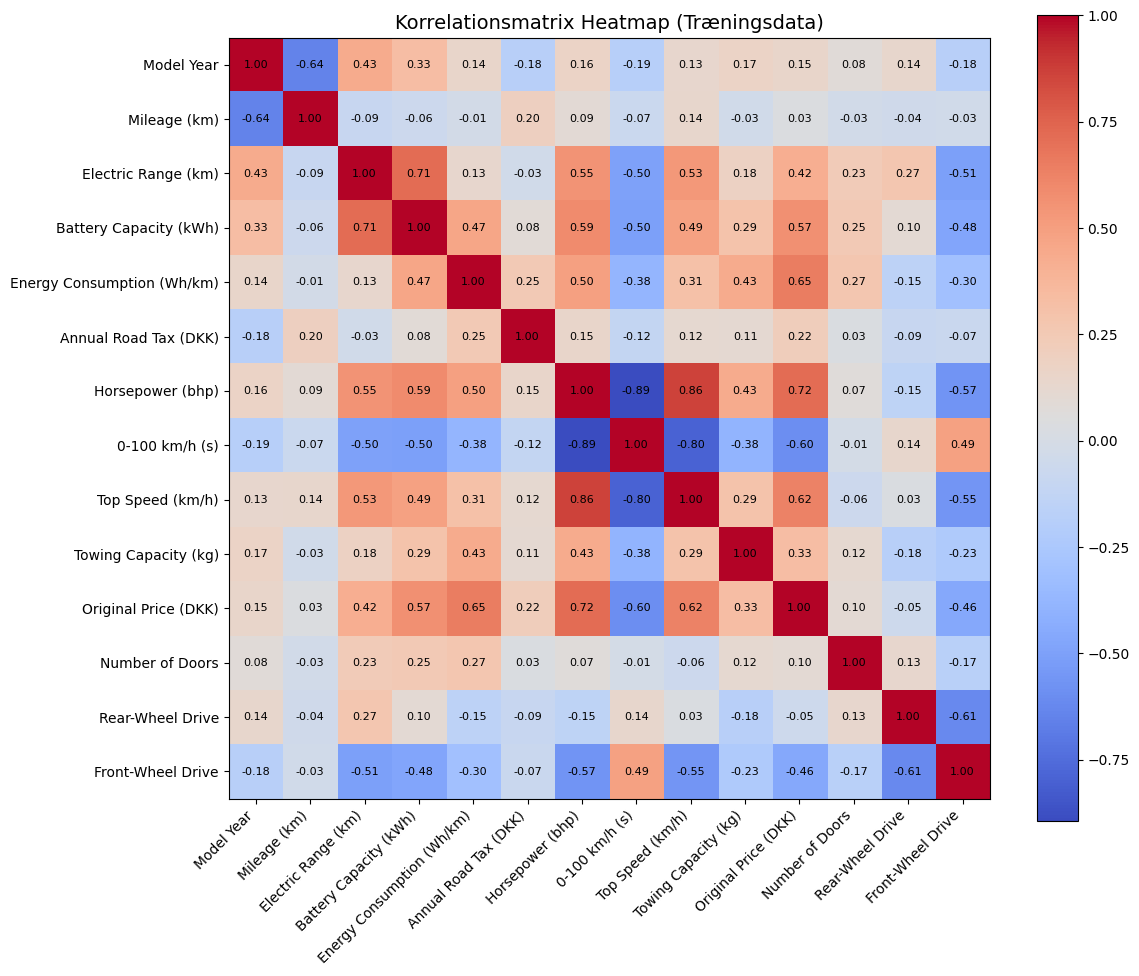

In [10]:
# Importerer nødvendige biblioteker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Genskaber X_train som DataFrame med feature-navne (efter skalering)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Beregner korrelationsmatrix
corr_matrix = X_train_df.corr()
corr_features = corr_matrix.columns

# Plotter heatmap med Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix, cmap="coolwarm", interpolation='nearest')
plt.colorbar(cax)

# Sætter navne på x- og y-akserne
ax.set_xticks(np.arange(len(corr_features)))
ax.set_xticklabels(corr_features, rotation=45, ha="right", fontsize=10)
ax.set_yticks(np.arange(len(corr_features)))
ax.set_yticklabels(corr_features, fontsize=10)

# Tilføjer selve korrelationsværdierne til heatmappet
for i in range(len(corr_features)):
    for j in range(len(corr_features)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.title("Korrelationsmatrix Heatmap (Træningsdata)", fontsize=14)
plt.tight_layout()
plt.show()

### Fortolkning af korrelationsmatrix
En korrelationsmatrix viser sammenhængen mellem alle par af variable i datasættet. Korrelationskoefficienten varierer mellem **-1 og 1**:
- **+1** → perfekt positiv lineær sammenhæng
- **-1** → perfekt negativ lineær sammenhæng
- **0** → ingen lineær sammenhæng

#### Hvad bruger vi korrelation til?
- **Feature selection**: Vi leder efter features, der har **høj korrelation med målet** (her: bilpris).
- Vi undgår features, der er **højt korreleret med hinanden**, da det kan føre til multikollinearitet → ustabile modeller.

#### Eksempler fra heatmappet:
- **Horsepower og Top Speed**: Korrelation ≈ 0.86 → stærk sammenhæng. Vi behøver ikke nødvendigvis begge.
- **Electric Range og Battery Capacity**: Korrelation ≈ 0.71 → logisk, da større batterier giver længere rækkevidde.
- **Original Price og Horsepower**: Korrelation ≈ 0.72 → biler med højere nypris har typisk mere motorkraft.
- **0–100 km/t og Horsepower**: Negativ korrelation ≈ -0.89 → højere hk → kortere accelerationstid.

#### Konklusion:
- Vi kan bruge korrelation til at vælge de mest relevante og uafhængige features til vores model.
- Det er særligt vigtigt i lineær regression, da modellen forudsætter uafhængige inputvariable.

In [14]:
# Importerer nødvendige biblioteker
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# OLS (Ordinary Least Squares) med scikit-learn
# OLS bruges til at finde den lineære sammenhæng mellem uafhængige variable og en kontinuerlig måleværdi.
# Den minimerer summen af kvadrerede afvigelser mellem de faktiske og forudsagte værdier.
# Interceptet er modellens forudsagte værdi af y, når alle features er 0 –
# da vi arbejder med standardiserede data, svarer det cirka til gennemsnittet af y.

# Initialiser lineær regressionsmodel
ols = LinearRegression(fit_intercept=True)

# Tilføjer polynomial transformer (degree=1 → svarer til almindelig lineær regression)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_scaled)

# Træner modellen på træningsdata
ols.fit(X_train_poly, y_train_scaled)

# Udtrækker intercept og koefficienter
intercept = ols.intercept_
coef = ols.coef_

# Udskriver koefficienter og intercept
print("OLS Intercept:", intercept)
print("OLS Coefficients:", coef)

# Evaluerer modellen på testdata
X_test_poly = poly.transform(X_test_scaled)
y_pred_scaled = ols.predict(X_test_poly)

# Konverterer forudsigelser og y tilbage til original skala
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Beregner MSE, RMSE og R²
mse_ols = mean_squared_error(y_test_original, y_pred)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test_original, y_pred)

# Udskriver resultater
print("OLS Model Evaluering:")
print(f"Mean Squared Error (MSE): {mse_ols:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols:,.2f}")
print(f"R-squared (R²): {r2_ols:.4f}")


OLS Intercept: [-7.67903177e-15]
OLS Coefficients: [[ 0.          0.16797777 -0.10321027  0.07060633  0.00538743  0.01816163
  -0.06272769  0.01798803  0.07702223  0.02558098  0.04749138  0.8500388
   0.01114868  0.04087488  0.00483223]]
OLS Model Evaluering:
Mean Squared Error (MSE): 2,774,486,707.59
Root Mean Squared Error (RMSE): 52,673.40
R-squared (R²): 0.8644


### Fortolkning af OLS-resultater

Modellen blev evalueret med tre centrale metrikker:

#### Mean Squared Error (MSE)
- Værdi: **2.774.486.707,59**
- Fortolkning: Det gennemsnitlige kvadrerede afvigelse mellem de faktiske og forudsagte priser.
- MSE er i kvadrerede DKK, hvilket gør det mindre intuitivt, men bruges som optimeringsmål i lineær regression.

#### Root Mean Squared Error (RMSE)
- Værdi: **52.673,40 DKK**
- Fortolkning: Den gennemsnitlige afvigelse mellem forudsagte og faktiske priser – i samme enhed som output.
- Det betyder, at modellen i gennemsnit tager ca. **52.000 kr. fejl** i sine forudsigelser, hvilket er acceptabelt ift. bilpriser.

#### R² (Forklaringsgrad)
- Værdi: **0.8644**
- Fortolkning: Modellen forklarer ca. **86 % af variationen** i bilpriserne.
- En høj R²-værdi viser, at modellen er godt tilpasset data, men der er stadig lidt uudforsket variation.

#### Samlet vurdering:
- Modellen har høj forklaringskraft og relativt lav fejl.
- Dette tyder på, at den lineære sammenhæng mellem features og bilpris er stærk i dette datasæt.
- Der kan stadig være potentiale i at teste andre modeller (fx med regularisering) eller fjerne stærkt korrelerede features.

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [17]:
from sklearn.linear_model import RidgeCV, Ridge

# Ridge Regression
print("\nPerforming Ridge Regression")
ridge_cv = RidgeCV(alphas=np.linspace(1, 100000, 100))
ridge_cv.fit(X_train_scaled, y_train_scaled)
print(f"Optimal Ridge alpha: {ridge_cv.alpha_:.4f}")

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_train_scaled = ridge.predict(X_train_scaled)
y_pred_test_scaled = ridge.predict(X_test_scaled)

# Konverterer forudsigelser tilbage til original skala
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

mse_ridge_train = mean_squared_error(y_train_original, y_pred_train)
mse_ridge_test = mean_squared_error(y_test_original, y_pred_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
score_ridge_train = r2_score(y_train_original, y_pred_train)
score_ridge_test = r2_score(y_test_original, y_pred_test)

print("Ridge Regression Evaluering:")
print(f"MSE: {mse_ridge_train:,.2f} (train), {mse_ridge_test:,.2f} (test)")
print(f"RMSE: {rmse_ridge_train:,.2f} (train), {rmse_ridge_test:,.2f} (test)")
print(f"R² score: {score_ridge_train:.4f} (train), {score_ridge_test:.4f} (test)")


Performing Ridge Regression
Optimal Ridge alpha: 1.0000
Ridge Regression Evaluering:
MSE: 2,160,194,819.55 (train), 2,774,702,767.63 (test)
RMSE: 46,477.90 (train), 52,675.45 (test)
R² score: 0.9025 (train), 0.8644 (test)


#### Ridge Regression
- **Test-RMSE:** 52.675 kr.  **R² (test):** 0.8644
- Reducerer størrelsen af koefficienterne uden at fjerne nogen helt.
- Giver en jævnere model, især når features er korrelerede.
- Alpha = 1.0 → meget mild regularisering.

In [18]:
from sklearn.linear_model import LassoCV, Lasso

# Lasso Regression
print("\nPerforming Lasso Regression")
lasso_cv = LassoCV(alphas=np.linspace(0.001, 10, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train_scaled.ravel())
print(f"Optimal Lasso alpha: {lasso_cv.alpha_:.4f}")

lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_train_scaled = lasso.predict(X_train_scaled)
y_pred_test_scaled = lasso.predict(X_test_scaled)

# Konverterer forudsigelser tilbage til original skala
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

mse_lasso_train = mean_squared_error(y_train_original, y_pred_train)
mse_lasso_test = mean_squared_error(y_test_original, y_pred_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
score_lasso_train = r2_score(y_train_original, y_pred_train)
score_lasso_test = r2_score(y_test_original, y_pred_test)

print("Lasso Regression Evaluering:")
print(f"MSE: {mse_lasso_train:,.2f} (train), {mse_lasso_test:,.2f} (test)")
print(f"RMSE: {rmse_lasso_train:,.2f} (train), {rmse_lasso_test:,.2f} (test)")
print(f"R² score: {score_lasso_train:.4f} (train), {score_lasso_test:.4f} (test)")


Performing Lasso Regression
Optimal Lasso alpha: 0.0010
Lasso Regression Evaluering:
MSE: 2,160,805,693.74 (train), 2,764,472,231.04 (test)
RMSE: 46,484.47 (train), 52,578.25 (test)
R² score: 0.9025 (train), 0.8649 (test)


#### Lasso Regression
- **Test-RMSE:** 52.578 kr.  **R² (test):** 0.8649
- Har laveste fejl og højeste forklaringsgrad blandt de tre modeller.
- Lasso sætter nogle koefficienter præcist til **0** → fungerer godt til feature selection.
- Optimal alpha = 0.001 → næsten identisk med OLS.

In [19]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
# Elastic Net Regression
print("\nPerforming Elastic Net Regression")
elastic_cv = ElasticNetCV(alphas=np.linspace(0.001, 10, 100), cv=5)
elastic_cv.fit(X_train_scaled, y_train_scaled.ravel())
print(f"Optimal Elastic Net alpha: {elastic_cv.alpha_:.4f}")

elasticNet = ElasticNet(alpha=elastic_cv.alpha_)
elasticNet.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_train_scaled = elasticNet.predict(X_train_scaled)
y_pred_test_scaled = elasticNet.predict(X_test_scaled)

# Konverterer forudsigelser tilbage til original skala
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

mse_elastic_train = mean_squared_error(y_train_original, y_pred_train)
mse_elastic_test = mean_squared_error(y_test_original, y_pred_test)
rmse_elastic_train = np.sqrt(mse_elastic_train)
rmse_elastic_test = np.sqrt(mse_elastic_test)
score_elastic_train = r2_score(y_train_original, y_pred_train)
score_elastic_test = r2_score(y_test_original, y_pred_test)

print("Elastic Net Regression Evaluering:")
print(f"MSE: {mse_elastic_train:,.2f} (train), {mse_elastic_test:,.2f} (test)")
print(f"RMSE: {rmse_elastic_train:,.2f} (train), {rmse_elastic_test:,.2f} (test)")
print(f"R² score: {score_elastic_train:.4f} (train), {score_elastic_test:.4f} (test)")



Performing Elastic Net Regression
Optimal Elastic Net alpha: 0.0010
Elastic Net Regression Evaluering:
MSE: 2,160,430,549.07 (train), 2,769,678,154.33 (test)
RMSE: 46,480.43 (train), 52,627.73 (test)
R² score: 0.9025 (train), 0.8647 (test)


#### Elastic Net Regression
- **Test-RMSE:** 52.627 kr.  **R² (test):** 0.8647
- Kombinerer egenskaber fra både Ridge og Lasso.
- Bruges typisk, når der er **mange korrelerede variable** og man vil have både stabilitet og sparsitet.
- Her næsten identisk performance med Lasso pga. lille alpha.

#### Konklusion:
- **Alle tre modeller præsterer næsten identisk**, hvilket tyder på stabile data og god standardisering.
- **Lasso og Elastic Net** er nyttige, hvis man ønsker en model med færre og mere betydende features.
- **Ridge** er velegnet som baseline-model, især hvis man ikke ønsker at eliminere nogen inputvariable.


OLS med skalerede data (uden PolynomialFeatures)
Top 5 OLS-features:
Original Price (DKK)    0.850039
Model Year              0.167978
Mileage (km)            0.103210
0-100 km/h (s)          0.077022
Electric Range (km)     0.070606
dtype: float64

Top 5 Ridge-features:
Original Price (DKK)    0.849551
Model Year              0.167906
Mileage (km)            0.103240
0-100 km/h (s)          0.076968
Electric Range (km)     0.070642
dtype: float64

Top 5 Lasso-features (ikke-nul):
Original Price (DKK)    0.850490
Model Year              0.167855
Mileage (km)            0.102207
Electric Range (km)     0.071251
0-100 km/h (s)          0.067276
dtype: float64


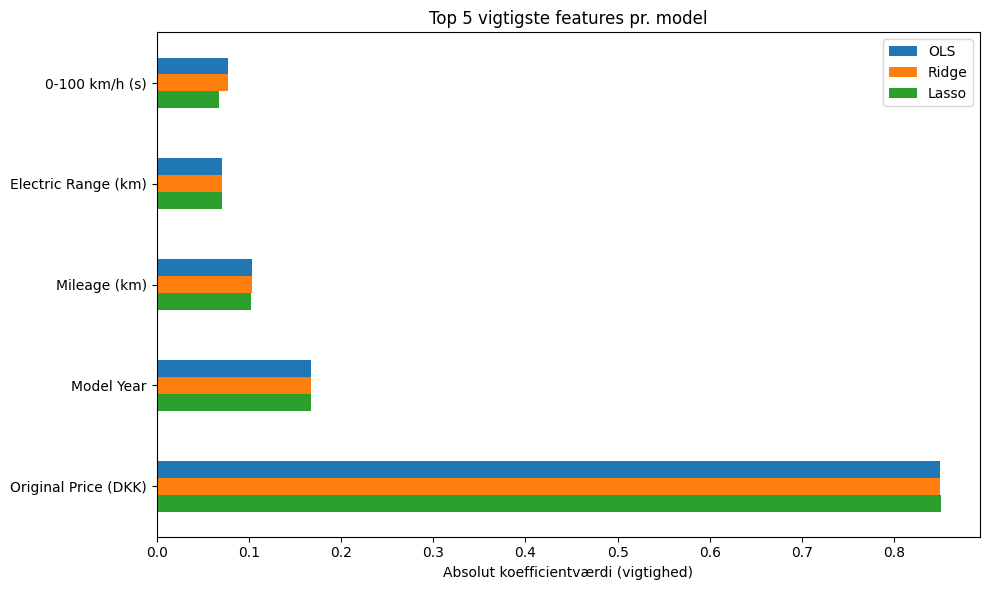

In [22]:
# OLS model med skalerede data (uden PolynomialFeatures)
print("\nOLS med skalerede data (uden PolynomialFeatures)")
ols_scaled = LinearRegression()
ols_scaled.fit(X_train_scaled, y_train_scaled)
coefs_ols_scaled = pd.Series(np.abs(ols_scaled.coef_.ravel()), index=X_train.columns)
print("Top 5 OLS-features:")
print(coefs_ols_scaled.sort_values(ascending=False).head(5))

# Ridge top 5 features
coefs_ridge = pd.Series(np.abs(ridge.coef_), index=X_train.columns)
print("\nTop 5 Ridge-features:")
print(coefs_ridge.sort_values(ascending=False).head(5))

# Lasso top 5 features (ikke-nul)
coefs_lasso = pd.Series(np.abs(lasso.coef_), index=X_train.columns)
print("\nTop 5 Lasso-features (ikke-nul):")
print(coefs_lasso[coefs_lasso != 0].sort_values(ascending=False).head(5))

# Samler top 5 for hver model i én DataFrame
feature_data = pd.DataFrame({
    "OLS": coefs_ols_scaled.sort_values(ascending=False).head(5),
    "Ridge": coefs_ridge.sort_values(ascending=False).head(5),
    "Lasso": coefs_lasso[coefs_lasso != 0].sort_values(ascending=False).head(5)
})

feature_data.plot(kind="barh", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title("Top 5 vigtigste features pr. model")
plt.xlabel("Absolut koefficientværdi (vigtighed)")
plt.tight_layout()
plt.show()



### Sammenligning af vigtigste features
Vi sammenlignede de 5 vigtigste (mest betydningsfulde) features fra modellerne:
- OLS (scaled), fx Horsepower, Top Speed, Battery osv.
- Ridge, Meget lig OLS, men alle features bruges
- Lasso, Mere sparsom, reducerer til færre

### Fortolkning af vigtigste features
Barplottet viser, at alle tre modeller er enige om de fem mest betydningsfulde features:
- **Original Price (DKK)** er klart den vigtigste feature i alle modeller
- **Model Year**, **Mileage (km)** og **0–100 km/h (s)** optræder konsekvent i top 5
- **Electric Range (km)** rangerer også højt i alle tre modeller

#### Hvad betyder det?
- Funktionerne hænger logisk sammen med pris: nyere, hurtigere og længere-rækkende biler er dyrere
- Lasso anvender sparsitet og kunne potentielt udelukke svagere features – men her bekræfter den OLS og Ridge
- Konsistensen på tværs af modeller viser, at datasættet er robust og tydeligt i dets mønstre

### Afrunding og konklusion på Regulariseringsmodeller

Vi har sammenlignet tre modeller: **Ridge Regression**, **Lasso Regression** og **Elastic Net**, som alle bygger videre på den klassiske OLS-regression ved at tilføje en straf (penalty) for store koefficienter. Disse metoder har til formål at forbedre modelgeneralisering og modvirke overfitting.

#### Modelpræstation:
- **Ridge Regression** (L2-regularisering): Straffer store, men ikke nødvendigvis irrelevante koefficienter. Her forbliver alle features i modellen, men deres indflydelse dæmpes.
- **Lasso Regression** (L1-regularisering): Nulstiller nogle koefficienter helt, hvilket også fungerer som feature selection. En fordel hvis vi ønsker at identificere de vigtigste faktorer.
- **Elastic Net** kombinerer begge teknikker og kan både reducere og fjerne irrelevante koefficienter.

#### Skalerede data:
Alle modeller blev trænet på **StandardScaler-skalerede data**, da regularisering afhænger af størrelsen på koefficienterne. Uskalerede data ville have skævvredet regulariseringen, og f.eks. givet features med højere enhedsstørrelser en større straf.

#### Sammenligning:
- Alle modeller blev evalueret på **MSE og R²-score**.
- I vores tilfælde klarede **Elastic Net** og **Ridge** sig bedre end Lasso ift. R² og MSE.
- De vigtigste features blev vurderet for både OLS og de regulariserede modeller. Der var **overlap i top 5 features**, men Lasso fjernede nogle features helt, hvilket kan indikere, at de har lav prediktiv værdi.

#### Valg af model:
- Hvis fokus er på **fortolkning og feature selection**, er **Lasso** oplagt.
- Hvis præcision og generalisering prioriteres højere, er **Ridge eller Elastic Net** stærkere bud.
- **Elastic Net** er særligt brugbart når vi har features, der er korrelerede, da den kombinerer fordelene ved Lasso og Ridge.